In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Case Study: ABC Co.

ABC Co. has the following cost information for ten units of products.

Find the cost equation using:

- High-Low Method
- Least-Squares Regression Method

In [2]:
ABC = pd.DataFrame({
        'Cost Activity': [1, 2, 2.5, 3, 3.5, 4, 5, 5, 5.5, 6],
        'Unit Cost': [5,6, 7.5, 9, 10.5, 11, 13, 15, 16.5, 15]
}, index=list(range(1,11)))

ABC

,Cost Activity,Unit Cost
1,1.0,5.0
2,2.0,6.0
3,2.5,7.5
4,3.0,9.0
5,3.5,10.5
6,4.0,11.0
7,5.0,13.0
8,5.0,15.0
9,5.5,16.5
10,6.0,15.0


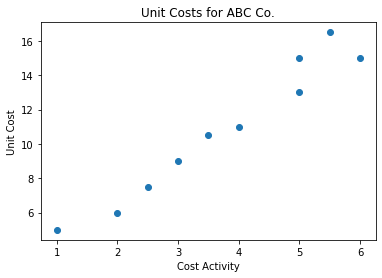

In [3]:
plt.scatter(ABC['Cost Activity'], ABC['Unit Cost'])
plt.title('Unit Costs for ABC Co.')
plt.xlabel('Cost Activity')
plt.ylabel('Unit Cost')
plt.show()

## High-Low Method

The high-low method uses the following formula to separate the fix and variable cost.

<h3><center>${Variable\ Cost\ per\ Unit\ = \ }\frac{Highest\ Activity\ Cost - Lowest\ Activity\ Cost}{Highest\ Activity - Lowest\ Activity}$</center></h3>

In [4]:
VC_per_unit = (ABC['Unit Cost'].loc[10]  - ABC['Unit Cost'].loc[1]) \
            / (ABC['Cost Activity'].loc[10]  - ABC['Cost Activity'].loc[1])

VC_per_unit

2.0

**Computation for Fixed Cost**

In [5]:
FC_highest = ABC['Unit Cost'].loc[10] - (VC_per_unit * ABC['Cost Activity'].loc[10])
FC_highest

3.0

In [6]:
FC_lowest = ABC['Unit Cost'].loc[1] - (VC_per_unit * ABC['Cost Activity'].loc[1])
FC_lowest

3.0

According to *High-Low Method*, the cost equation for ABC Co. is 

<h3><center>${Unit\ Cost\ =\ 2\ \times\ Cost\ Activity\ +\ 3}$</center></h3>

where 2 is the Variable Cost per unit, and 3 is the Fixed Cost.

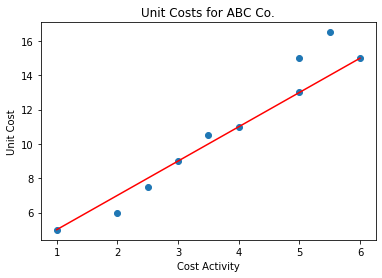

In [7]:
plt.scatter(ABC['Cost Activity'], ABC['Unit Cost'])
plt.title('Unit Costs for ABC Co.')
plt.xlabel('Cost Activity')
plt.ylabel('Unit Cost')

plt.plot(ABC['Cost Activity'], VC_per_unit*ABC['Cost Activity']+FC_highest, 'r')
plt.show()

## Least Squares Regression Method

The *Least Squares Regression Method* gives us the line of best fit using this formula:

<h3><center>${Variable\ Cost\ per\ Unit\ = \ }\frac{\sum{xy}\ -\ n(\bar{x})(\bar{y})}{\sum{x^{2}}\ -\ n(\bar{x})^{2}}$</center></h3>

<h3><center>${Fixed\ Cost = \bar{y} - Variable\ Cost\ per\ Unit\ \times{\bar{x}}}$</center></h3>

In [8]:
x_mean = ABC['Cost Activity'].mean()
y_mean = ABC['Unit Cost'].mean()
n = len(ABC)

print(f'{x_mean = }', f', {y_mean = }', f', {n = }')

x_mean = 3.75 , y_mean = 10.85 , n = 10


In [9]:
ABC['xy'] = ABC['Cost Activity'] * ABC['Unit Cost']
ABC['x_squared'] = ABC['Cost Activity'] **2

ABC

,Cost Activity,Unit Cost,xy,x_squared
1,1.0,5.0,5.00,1.00
2,2.0,6.0,12.00,4.00
3,2.5,7.5,18.75,6.25
4,3.0,9.0,27.00,9.00
5,3.5,10.5,36.75,12.25
6,4.0,11.0,44.00,16.00
7,5.0,13.0,65.00,25.00
8,5.0,15.0,75.00,25.00
9,5.5,16.5,90.75,30.25
10,6.0,15.0,90.00,36.00


In [10]:
lsr_VC_per_unit = (sum(ABC['xy']) - (n * x_mean * y_mean) ) \
        / (sum(ABC['x_squared']) - (n * (x_mean ** 2)))

lsr_FC = y_mean - (lsr_VC_per_unit * x_mean)

print(f'{lsr_VC_per_unit = :,.4}')
print(f'{lsr_FC = :,.4}')

lsr_VC_per_unit = 2.378
lsr_FC = 1.932


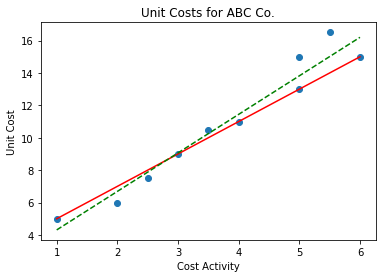

In [11]:
plt.scatter(ABC['Cost Activity'], ABC['Unit Cost'])
plt.title('Unit Costs for ABC Co.')
plt.xlabel('Cost Activity')
plt.ylabel('Unit Cost')
plt.plot(ABC['Cost Activity'], VC_per_unit*ABC['Cost Activity']+FC_highest, 'r')
plt.plot(ABC['Cost Activity'], lsr_VC_per_unit*ABC['Cost Activity']+lsr_FC, '--g')
plt.show()

## Error Rate Computation

In [12]:
err = pd.DataFrame()
err['Actual Cost (y)'] = ABC['Unit Cost']
err['HighLow (y1)'] = VC_per_unit*ABC['Cost Activity']+FC_highest
err['LSR (y2)'] = lsr_VC_per_unit*ABC['Cost Activity']+lsr_FC

err['y1 - y'] = err['HighLow (y1)'] - err['Actual Cost (y)']
err['y2 - y'] = err['LSR (y2)'] - err['Actual Cost (y)']

err

,Actual Cost (y),HighLow (y1),LSR (y2),y1 - y,y2 - y
1,5.0,5.0,4.309845,0.0,-0.690155
2,6.0,7.0,6.688083,1.0,0.688083
3,7.5,8.0,7.877202,0.5,0.377202
4,9.0,9.0,9.066321,0.0,0.066321
5,10.5,10.0,10.255440,-0.5,-0.244560
6,11.0,11.0,11.444560,0.0,0.444560
7,13.0,13.0,13.822798,0.0,0.822798
8,15.0,13.0,13.822798,-2.0,-1.177202
9,16.5,14.0,15.011917,-2.5,-1.488083
10,15.0,15.0,16.201036,0.0,1.201036


In [13]:
print(f"{sum(err['y1 - y']):,.10}")
print(f"{sum(err['y2 - y']):.2}")

-3.5
-9.8e-15
